## Facial Recognition with Torch
#### M10 AI Workshop 2024-11-02, Gothenburg

CNN / Convolutional NN

IMG -> Cov2D -> ReLU -> Pool -> Flatten -> Linear -> Softmax -> Classification

Conv2D:
-> Extract features

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
import kagglehub
path = kagglehub.dataset_download("shrike2005/gender-classification-utk-face-dataset")

In [3]:
data = datasets.ImageFolder(
    root=path,
    transform=transforms.ToTensor() # Also normalizes
)

In [4]:
img, label = data[0]

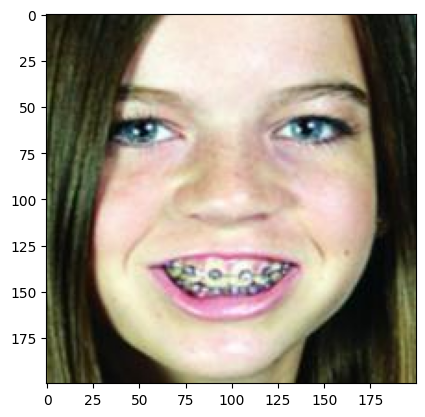

In [5]:
import numpy as np
img, label = data[np.random.randint(1,2000)]
plt.imshow(img.permute(1,2,0))

In [6]:
dataloader = DataLoader(
    data,
    batch_size=256, # Batching data to avoid overloadning GPU.
    num_workers=4,
    prefetch_factor=10
)

In [7]:
data, data[0]

(Dataset ImageFolder
     Number of datapoints: 23708
     Root location: /Users/akilles/.cache/kagglehub/datasets/shrike2005/gender-classification-utk-face-dataset/versions/1
     StandardTransform
 Transform: ToTensor(),
 (tensor([[[0.8588, 0.9098, 0.9098,  ..., 0.8863, 0.8588, 0.8627],
           [0.8941, 0.9255, 0.9020,  ..., 0.8784, 0.8627, 0.8627],
           [0.9137, 0.9255, 0.8863,  ..., 0.8627, 0.8667, 0.8588],
           ...,
           [0.1059, 0.1412, 0.1490,  ..., 0.6667, 0.7059, 0.7176],
           [0.1059, 0.0941, 0.0706,  ..., 0.9882, 0.9961, 0.9882],
           [0.0863, 0.0353, 0.0078,  ..., 0.9882, 0.9961, 0.9961]],
  
          [[0.8745, 0.9216, 0.9294,  ..., 0.9137, 0.8863, 0.8902],
           [0.9098, 0.9373, 0.9176,  ..., 0.9059, 0.8902, 0.8902],
           [0.9255, 0.9373, 0.9020,  ..., 0.8902, 0.8941, 0.8863],
           ...,
           [0.1843, 0.2314, 0.2627,  ..., 0.6863, 0.7176, 0.7373],
           [0.1961, 0.1922, 0.1922,  ..., 1.0000, 1.0000, 1.0000],
    

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [8]:
# device = torch.device("cuda")

model = nn.Sequential(
    nn.Conv2d(3, 64, 3),        # RGB, n features, kernel size,
    nn.ReLU(),                  # ReLU removes 0 values
    nn.AdaptiveAvgPool2d(1),    # Pooling = average activation of feature ("How much of the feature is found?")
    nn.Flatten(),               # Flattten (Reformat for linear layer)
    nn.Linear(64, 2),
    nn.Softmax(1)               # Softmax, remake into a probability dist
)#.to(device)

## Training

### Loss function
- Measures how far model predictions are from true values
- Lower loss (closer to 0) indicates better performance

Common loss functions:
- Cross Entropy Loss (classification)
- Mean Absolute Error (regression)
- Mean Squared Error (regression)


### Optimization

Process of improving model performance by adjusting weights
Popular optimizers:

SGD (Stochastic Gradient Descent)
- Simple, classic approach
- Updates weights based on batches of data

Adam
- More sophisticated optimizer
- Adaptive learning rates
- Generally better performance than SGD
- [PyTorch Documentation](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)



### Training Process

- Model starts with random weights
- Kernel weights are randomly initialized


**Forward Pass**

- Model makes predictions on batch of data
- Loss is calculated


**Backpropagation**

- Calculates gradients of the loss
- Determines how to adjust weights
- Propagates error backwards through network


**Weight Updates**

- Optimizer uses gradients to update weights
- Model gradually improves


**Evaluation**

- Model performance is measured
- Cross-validation helps prevent overfitting
- Loss metrics track improvement


### Best Practices

- Use appropriate batch size for GPU memory
- Enable parallel data loading when possible
- Monitor training and validation loss
- Choose appropriate optimizer and loss function for your task
- Use cross-validation to ensure model generalizes well

In [9]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [10]:
from tqdm.notebook import tqdm

In [11]:
train_loss = []


In [12]:
# # Train model on batches

# for _ in tqdm(range(3)):
#     avg_loss = 0

#     for images, labels in dataloader:
#         # images = images.to(device)
#         # labels = labels.to(device)
        
#         optimizer.zero_grad() # Reset
        
#         predictions = model(images)

#         loss = loss_function(predictions, labels)

#         loss.backward()

#         optimizer.step()
    
#     avg_loss /= len(dataloader)
#     train_loss.append(avg_loss)
    
    

Training:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5:   0%|          | 0/186 [00:00<?, ?it/s]


Epoch 1/5
Average loss: 0.3580


Epoch 2/5:   0%|          | 0/186 [00:00<?, ?it/s]


Epoch 2/5
Average loss: 0.3137


Epoch 3/5:   0%|          | 0/186 [00:00<?, ?it/s]


Epoch 3/5
Average loss: 0.3134


Epoch 4/5:   0%|          | 0/186 [00:00<?, ?it/s]


Epoch 4/5
Average loss: 0.3133


Epoch 5/5:   0%|          | 0/186 [00:00<?, ?it/s]


Epoch 5/5
Average loss: 0.3133


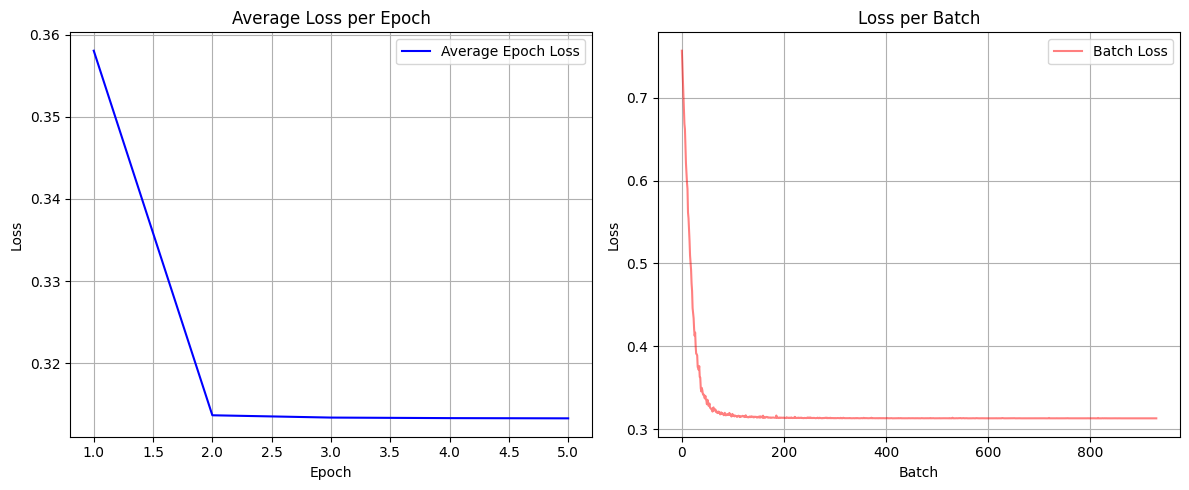


Training Summary:
Initial loss: 0.7565
Final loss: 0.3133
Best loss: 0.3133
Average loss across all batches: 0.3223


In [13]:
from torch.utils.data import SubsetRandomSampler

dataset_size = len(data)
indices = list(range(dataset_size))
split_idx = int(np.floor(0.5 * dataset_size))
np.random.shuffle(indices)
train_indices = indices[:split_idx]

# Create a sampler for the subset
train_sampler = SubsetRandomSampler(train_indices)

dataloader = DataLoader(
    data,
    batch_size=64,
    sampler=train_sampler
)

train_loss = []
batch_losses = []  # store individual batch losses
epochs = 5

for epoch in tqdm(range(epochs), desc="Training"):
    epoch_loss = 0
    batch_count = 0
    
    batch_pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)
    
    for images, labels in batch_pbar:
        # images = images.to(device) # for GPU
        # labels = labels.to(device)
        
        optimizer.zero_grad()
        predictions = model(images)
        loss = loss_function(predictions, labels)
        loss.backward()
        optimizer.step()
        
        # Track losses
        current_loss = loss.item()
        epoch_loss += current_loss
        batch_losses.append(current_loss)
        batch_count += 1

        batch_pbar.set_postfix({'batch_loss': f'{current_loss:.4f}'})
    
    avg_epoch_loss = epoch_loss / batch_count
    train_loss.append(avg_epoch_loss)
    
    print(f"\nEpoch {epoch+1}/{epochs}")
    print(f"Average loss: {avg_epoch_loss:.4f}")



# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss, 'b-', label='Average Epoch Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Loss per Epoch')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(batch_losses, 'r-', alpha=0.5, label='Batch Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Loss per Batch')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print("\nTraining Summary:")
print(f"Initial loss: {batch_losses[0]:.4f}")
print(f"Final loss: {batch_losses[-1]:.4f}")
print(f"Best loss: {min(batch_losses):.4f}")
print(f"Average loss across all batches: {np.mean(batch_losses):.4f}")

In [17]:
train_loss[-1]

0.31330403685569763

In [21]:
avg_accuracy = 0
for images, labels in dataloader:
    predictions = model(images)
    accuracy = sum(torch.argmax(predictions, dim=1) == labels) / len(images)

    avg_accuracy += accuracy

## Improving our model

- Adjust model layers/parameters
- Improve the dataset with transforms (create synthetic data)


Prevent overfitting. Don't train on full dataset. Train|Test split.